In [1]:
import pandas as pd

In [56]:
df = pd.read_csv('./data/배달원(전처리).csv')

df.reset_index()
df = df[['종사자수']]
df

,종사자수
0,355000
1,313000
2,343000
3,371000
4,423000


In [49]:
# list=[]
# a = df.iloc[1,0] - df.iloc[0,0]
# b = df.iloc[2,0] - df.iloc[1,0]
# c = df.iloc[3,0] - df.iloc[2,0]
# list = [a,b,c]
# list

# 사고건수

In [50]:
df_2 = pd.read_csv('./data/사고건수.csv')
df_2

,기준년도,2017,2018,2019,2020,2021
0,사고건수,18241.0,17611.0,20898.0,21258.0,20598.0
1,사망자수,564.0,537.0,498.0,525.0,459.0
2,부상자수,22082.0,21621.0,26514.0,27348.0,26617.0


# 사고율

In [59]:
df_3 = pd.read_excel('./data/2021년도기준 교통사고 현황(최근5년)_전국.xlsx', header = 2)
df_3 = df_3[df_3['유형']=='사고건수']
df_3 = df_3.loc[[0,18],:]
df_3 = df_3.T

In [60]:
df_3 = df_3.rename(columns=df_3.loc['구분'])
df_3 = df_3.drop(['구분','유형'])
df_3

,전체사고,이륜차사고
2017년,216335,18241
2018년,217148,17611
2019년,229600,20898
2020년,209654,21258
2021년,203130,20598


In [28]:
df_3['사고율'] = df_3['이륜차사고'] / df_3['전체사고'] * 100
df_3 = df_3[['사고율']]
df_3 = df_3.reset_index(drop=True)

In [29]:
df_3['사고율'] = df_3['사고율'].astype(float)
df_3['사고율'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5 entries, 0 to 4
Series name: 사고율
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 168.0 bytes


# Concat

In [30]:
df = pd.concat([df,df_3], axis=1)
df = df.drop(0).reset_index(drop=True)
df

,종사자수,사고율
0,313000,8.110137
1,343000,9.101916
2,371000,10.139563
3,423000,10.140304


In [62]:
df_num = df_3[['이륜차사고']]
df_num = df_num.reset_index(drop=True)

In [63]:
df_graph = pd.concat([df,df_num], axis=1)
df_graph

,종사자수,이륜차사고
0,355000,18241
1,313000,17611
2,343000,20898
3,371000,21258
4,423000,20598


# 선형 회귀

In [33]:
### 사용할 라이브러리 불러오기

import numpy.linalg as lin
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df

,종사자수,사고율
0,313000,8.110137
1,343000,9.101916
2,371000,10.139563
3,423000,10.140304


In [35]:
### 2. Linear Regression() 함수를 이용하는 방법
#  - 모델을 생성할 수 있다.
#  - 학습(fit()) 및 예측(predict()) 함수 사용 가능

### 사용할 라이브러리 불러오기

from sklearn.linear_model import LinearRegression

In [ ]:
### 데이터 생성하기
# - 위에서 사용한 독립변수(x) 및 종속변수(y) 값 사용
xx = x
yy = y


### 모델 객체 생성하기 : LinearRegression()
model = LinearRegression()

### 학습모델 생성하기 : fit()
# 학습 데이터로 모형 추정 : y절편, 기울기 추출
fit_model = model.fit(xx, yy) 

# 기울기 89.47430739
print("기울기 = ", fit_model.coef_)   
print("-------------------------------")

# y절편 100.0
print("y절편 = ", fit_model.intercept_) 
print("-------------------------------")

### 예측모델 테스트 : predict()

# 예측값(y) 확인하기
y_pred2 = fit_model.predict(xx[[0]])
print('y_pred2 :', y_pred2)
print("-------------------------------")

# 예측값(y) 확인하기
y_pred2_new = fit_model.predict([[66]])
print('y_pred2_new :', y_pred2_new)

### 4. scipy의 stats 라이브러리의 linregress() 함수 사용 가능

In [ ]:
### 사용할 라이브러리 불러들이기

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### 데이터 생성하기
# - data 폴더의 score_iq.csv 파일 사용
# - IQ가 점수(score)에 영향을 미치는지 예측
print(df.head(3))  
print("-------------------------------")
print(df.info())


### 독립변수(x) 및 종속변수(y) 생성하기
x = df.종사자수
y = df.사고율

In [ ]:
### 상관계수 확인하기
# 확인방법(1) : pandas 라이브러에서 지원하는 corr() 사용
# - iq와 score의 상관계수 : 0.882220
print("확인방법(pandas) = \n", df.corr())
print("-------------------------------")

# 확인방법(2) : numpy 라이브러에서 지원하는 corrcoef() 사용
# - iq와 score의 상관계수 : 0.88222034
print("확인방법(numpy) =  \n", np.corrcoef(x, y)) 
# 긍정적 영향을 확인 할 땐 양수의 독립변수,
# 부정적 영향을 확인 할 땐 음수의 독립변수를 선택한다

In [ ]:
### 학습 모델 생성하기
model = stats.linregress(x, y)

print(model)
print("-------------------------------")

print('p-value :', model.pvalue)  # p-value : 2.8476895206683644e-50
print('p-value {:.3f}:'.format(2.8476895206683644e-50))  # p-value : 2.8476895206683644e-50
print("-------------------------------")

print('기울기(slope) :', model.slope)      # 기울기 : 0.6514309527270075
print("-------------------------------")

print('y절편(intercept) :', model.intercept)  # y절편 : -2.8564471221974657
print("-------------------------------")

In [ ]:
### (모델 해석)
# pvalue=2.8476895206683644e-50 < 0.05 이므로 현재 모델은 유의하다.
# iq가 score에 영향을 준다.
# 회귀식(y = ax + b) 완성 
#  : y = 0.6514309527270075 * x -2.8564471221974657 

### 직접 예측해 보기
print('예측결과 :', 1.9131355932203402e-05 * 355000 + 2.277580508474573)
# 예측결과 : 88.34388625958358
print("-------------------------------")

print("-------------------------------")
print('예측결과 :', model.slope * 155 + model.intercept)
# 예측결과 : 98.11535055048869

In [ ]:
df

#3

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

In [ ]:
### 데이터 생성하기

# - 데이터는 위에서 사용한 xx 및 yy 값 사용
# - 독립변수(x)의 값의 경우 2차원 리스트에서 1차원으로 축소하여,
#   x 및 y 컬럼을 가지는 데이터프레임 형태로 구성해야함
# - 따라서, x값은 차원을 축소해야함 : flatten()함수 사용

### 차원축소
x1 = np.array(df['사고율']).flatten() 
print("독립변수(x1), x1.shape(차원확인) = \n", x1.shape)   
print("-------------------------------")

y1 = df['종사자수']
print("종속변수(y1) = \n", y1)   
print("-------------------------------")

data = np.array([x1, y1])

### 데이터프레임 형태로 : 데이터 생성하기
df = pd.DataFrame(data.T)
df.columns = ['x1', 'y1']
print("생성된 데이터(df) 확인 = \n", df.head(3))   
print("-------------------------------")

### 학습모델 생성하기
#  - 모델 객체 생성 : smf.ols()
#  - 학습모델 생성 : fit()
#  - 아래는 객체 생성과 학습모델 생성을 한번에 처리하였음
#  - formula(학습 데이터) = '종속변수 ~ 독립변수'
model2 = smf.ols(formula='y1 ~ x1', data=df).fit()

### 학습모델 결과 확인하기
# - R-squared : 결정계수(1에 까가울 수록 학습모델이 좋은 것임) ✓✓✓
# - Adj. R-squared : 수정결정계수(1에 까가울 수록 학습모델이 좋은 것임)
# - *** 독립변수가 많을 경우 R-squared과 Adj. R-squared의 차이가 클 경우 
#       독립변수 [이상치를 확인]해야한다. ***

# - x1의 p-value : 0.000 < 0.05 => 모델은 유효하다. ✓✓✓
# - x1의 std err(표준 오차) : 7.29e-15 = 0.0000
# - x1의 Intercept(y절편) : 100.0000 ✓✓
# - x1의 coef(기울기) : 89.4743 ✓✓
# - x1의 Kurtosis(첨도) : 6.605 => 일반적으로 3보다 클경우,
#   평균에 데이터가 몰려있다고 판단한다.
#   kurtosis() 첨도는 확률분포에서 분포의 [뾰족한 정도]를 나타내는 [척도]입니다. 
#   --> 첨도가 높은 경우: 데이터의 분포가 평균(혹은 중심)에 많이 몰려 있어 뾰족하다
print("학습모델 결과 = \n", model2.summary())  
print("-------------------------------")

print("표준오차(std err) : 7.29e-15 = {:.9f}".format(7.29e-15))
print("-------------------------------")

### 예측값 확인 함수
# 예측에 사용할 독립변수 : [-1.70073563 -0.67794537]   
print("예측에 사용할 독립변수 = \n", x1[:2]) 
print("-------------------------------")

# 예측(테스트)을 위해서는 사용할 독립변수도
#  - 데이터프레임 형태로 구성해야 함
# 기존 자료로 검증하기 위해 독립변수의 추출값을 데이터프레임으로 구성
new_df = pd.DataFrame({'x1':[-1.70073563, -0.67794537]}) 

### 예측하기 : predict(테스트 데이터(x))
new_pred = model2.predict(new_df)
print('예측결과(new_pred) :\n', new_pred)   
print("-------------------------------")

new2_df = pd.DataFrame({'x1':[123, -2.34567]}) # 새로운 값에 대한 예측 결과 확인
new2_pred = model2.predict(new2_df)
print('예측결과(new_pred) :\n', new2_pred)

# 다항회귀

[377300.] [313000 343000 371000 423000]


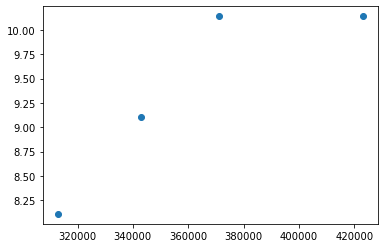

x = 
 [[313000]
 [343000]
 [371000]
 [423000]]
-------------------------------
예측(테스트) 결과 =  [9.64524686]


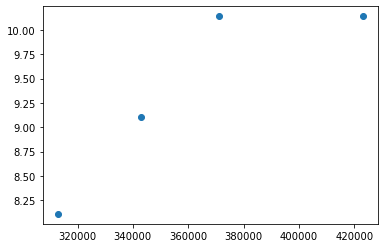

poly =  PolynomialFeatures(degree=3, include_bias=False)
x2= 
 [[3.77300000e+05 1.42355290e+11 5.37106509e+16]]
model = 
 LinearRegression()
---------------------------
기울기 =  [-1.70850313e-03  5.03603329e-09 -4.83649112e-15]
-------------------------------
y절편 =  197.80407151275858
-------------------------------
예측값(y_pred2) = 
 [ 8.1101369   9.10191639 10.13956328 10.14030419]
예측값(y_pred3) = 
 [10.32073368]
-------------------------------
실제값(y) = 
 [ 8.11013687  9.10191638 10.13956328 10.14030424]
-------------------------------
-------------------------------


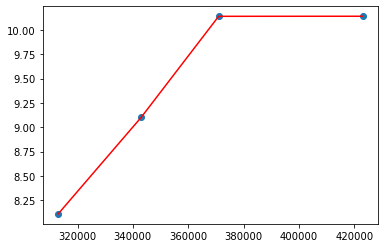

In [36]:
import numpy as np

### 독립변수(x) 데이터를 메트릭스 형태로 변형하기
#    - 향후 다항회귀로 변환시 차원 확대를 위해서..
### 데이터 생성하기
x_test = np.array([343000*1.1])
x = np.array(df['종사자수'])
y = np.array(df['사고율'])

print(x_test,x)

# 산점도 시각화
plt.scatter(x, y) 
plt.show()

### 산점도가 직선을 띄지않고 곡선을 띄고 있다.
from sklearn.linear_model import LinearRegression

# np.newaxis : 입력을 matrix로 변환
x_test = x_test[:, np.newaxis]
x = x[:, np.newaxis] 
print("x = \n", x)
print("-------------------------------")

### 선형회귀 모델 생성하기

# 선형회귀 학습모델 생성하기
model = LinearRegression().fit(x, y) 

# 예측(테스트) 하기
y_pred = model.predict(x_test)
print("예측(테스트) 결과 = ", y_pred)
# [2.  2.7 3.4 4.1 4.8]

### 산점도 시각화
plt.scatter(x, y) 

### 추세선 그래프 그리기
plt.plot(x_test, y_pred, c='red') 
plt.show()

### 다항식 특징을 추가하기

from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures() : 2차항 적용을 위한 함수 
#  - degree : 열 개수, 
#  - include_bias : 편향 (false = 고려안함)
#  - 편향이란?
#    : 예측값이 정답과 얼마나 다른가(차이가 있는가, 떨어져 있는가, 
#       멀게 있는가 등등) 를 표현한 것
poly = PolynomialFeatures(degree=3, include_bias = False) 
print("poly = ", poly)

### 특징 행렬 생성하기 : 다항으로 변환하기
#  - fit_transform() : 독립변수(x)의 데이터를 2차항으로 변형
x2 = poly.fit_transform(x) 
x2_test = poly.fit_transform(x_test) 
print("x2= \n", x2_test)

### 다항으로 변환된 독립변수(x2)의 값 사용을 위한 
### 선형회귀 모델 생성하기

# 선형회귀분석에서 결정계수 확인을 위한 라이브러리
from sklearn.metrics import r2_score

# 선형회귀 학습모델 생성 : 다항 독립변수(x2)를 사용
model2 = LinearRegression().fit(x2, y) 

print("model = \n", model2)
print("---------------------------")

# 기울기 
print("기울기 = ", model2.coef_)   
print("-------------------------------")

# y절편
print("y절편 = ", model2.intercept_) 
print("-------------------------------")

# 예측(테스트) 하기..
y_pred2 = model2.predict(x2)
y_pred3 = model2.predict(x2_test)

### 결과 확인해 보기
print("예측값(y_pred2) = \n", y_pred2)
print("예측값(y_pred3) = \n", y_pred3)
print("-------------------------------")

print("실제값(y) = \n", y)
print("-------------------------------")

# 결정계수(R-squared)
#print("결정계수(R-squared) = ", r2_score(y, y_pred2))   
print("-------------------------------")

### 다항 회귀 시각화 하기
# 산점도 표시
plt.scatter(x, y)

# 다항회귀모델 예측결과 값을 이용한 추세선 그래프
plt.plot(x, y_pred2, c='red') 
plt.show()

### (해석)
# - 실제 독립변수(x)의 곡선의 분포에 맞게
# - 다항회귀분석 예측 결과 추세선이 잘 그려졌음
# - 결정계수(R-squared)의 값이 [0.994]로 
#   예측 결과가 매우 정확한 모델로 확인됨

# 시각화

In [38]:
df.index=[2018,2019,2020,2021]

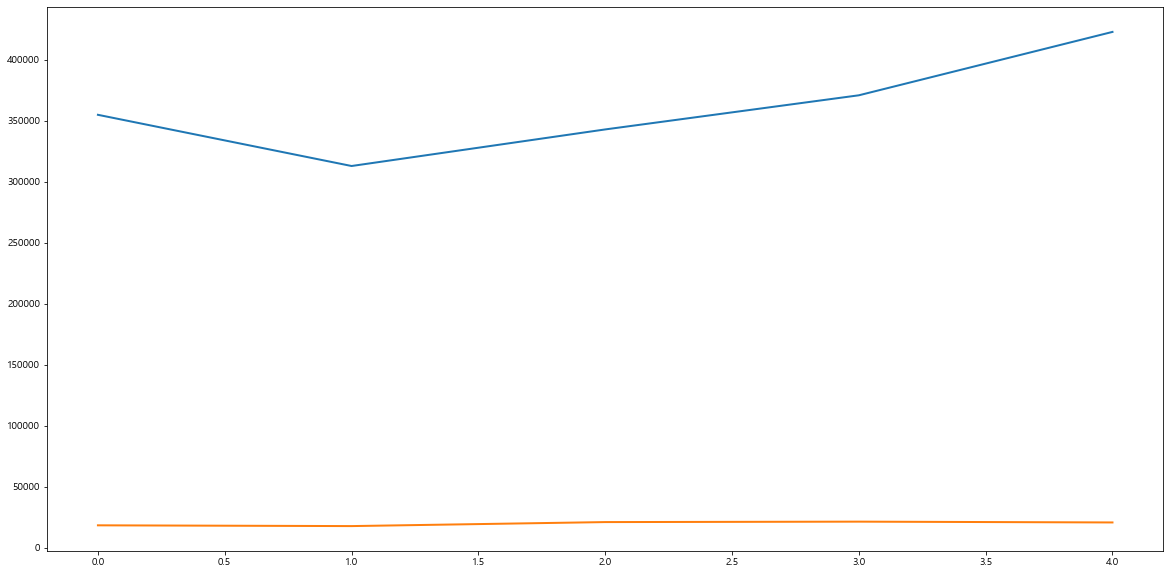

In [64]:
plt.plot(df_graph)

In [67]:
df_graph

,종사자수,이륜차사고
0,355000,18241
1,313000,17611
2,343000,20898
3,371000,21258
4,423000,20598


(array([17000., 17500., 18000., 18500., 19000., 19500., 20000., 20500.,
        21000., 21500.]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

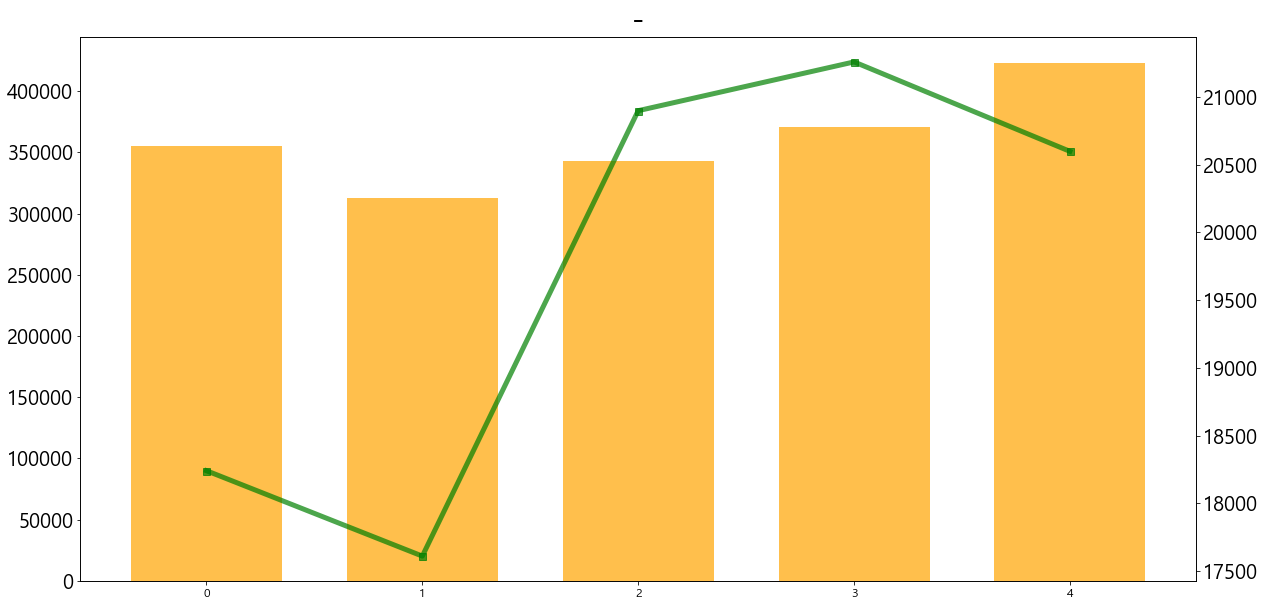

In [70]:
fig, ax1 = plt.subplots()
ax1.bar(df_graph.index, df_graph['종사자수'],color='orange', label='Demand', alpha=0.7, width=0.7)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 20)
# ax1.legend('사업체수',fontsize = 30)
plt.title('-', fontsize= 30)

ax2 = ax1.twinx()
ax2.plot(df_graph.index, df_graph['이륜차사고'],'-s', color='green', markersize=7, linewidth=5, alpha=0.7)
plt.yticks(fontsize=20)